In [1]:
import tensorflow as tf
from keras import backend as K

sess = tf.Session()
K.set_session(sess)

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, InputLayer, Dense, Flatten, Dropout
from keras.utils.np_utils import to_categorical

In [4]:
data = np.load('mnist_digit_sample_8dsistortions9x9.npz')

In [5]:
X_train = np.expand_dims(data['X_train'], axis=-1)
Y_train = to_categorical(np.reshape(data['y_train'], (-1)))
X_test = np.expand_dims(data['X_test'], axis=-1)
Y_test = to_categorical(np.reshape(data['y_test'], (-1)))

In [16]:
data.files

['X_train', 'y_train', 'X_valid', 'y_valid', 'X_test', 'y_test']

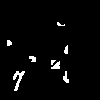

In [7]:
array_to_img(X_train[10000])

In [10]:
K.clear_session()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(100,100,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               18874496  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
model.fit(X_train[:100], Y_train[:100], validation_split=0.25, epochs=10)

Train on 75 samples, validate on 25 samples
Epoch 1/10
75/75 [==============================] - 10s - loss: 2.3183 - acc: 0.0800 - val_loss: 2.3558 - val_acc: 0.0400
Epoch 2/10
75/75 [==============================] - 7s - loss: 1.8532 - acc: 0.5467 - val_loss: 2.5676 - val_acc: 0.0800
Epoch 3/10
75/75 [==============================] - 7s - loss: 1.2762 - acc: 0.6667 - val_loss: 2.5195 - val_acc: 0.0800
Epoch 4/10
75/75 [==============================] - 7s - loss: 0.6070 - acc: 0.8933 - val_loss: 3.0323 - val_acc: 0.0400
Epoch 5/10
75/75 [==============================] - 7s - loss: 0.2195 - acc: 0.9600 - val_loss: 3.1516 - val_acc: 0.0400
Epoch 6/10
75/75 [==============================] - 7s - loss: 0.1573 - acc: 0.9733 - val_loss: 3.3976 - val_acc: 0.0400
Epoch 7/10
75/75 [==============================] - 8s - loss: 0.0890 - acc: 0.9867 - val_loss: 3.6365 - val_acc: 0.0400
Epoch 8/10
75/75 [==============================] - 7s - loss: 0.0668 - acc: 0.9867 - val_loss: 4.0875 - val

In [15]:
X_train[0].max()

1.0